important libraries 


In [79]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')

Data Exploration

In [80]:
#loading data
df = pd.read_csv("/kaggle/input/house-dataset/house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [81]:
#structure of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [82]:
print(np.max(df , axis=0))
print("------------------------")
print(np.min(df , axis =0))
#we need to make scale

id                    9900000190
date             20150527T000000
price                  7700000.0
bedrooms                      33
bathrooms                    8.0
sqft_living                13540
sqft_lot                 1651359
floors                       3.5
waterfront                     1
view                           4
condition                      5
grade                         13
sqft_above                  9410
sqft_basement               4820
yr_built                    2015
yr_renovated                2015
zipcode                    98199
lat                      47.7776
long                    -121.315
sqft_living15               6210
sqft_lot15                871200
dtype: object
------------------------
id                       1000102
date             20140502T000000
price                    75000.0
bedrooms                       0
bathrooms                    0.0
sqft_living                  290
sqft_lot                     520
floors                       1.0
wate

In [83]:
#data preprocessing
print(df['date'].value_counts()) #little frequency
print(df['id'].value_counts())

date
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150110T000000      1
20140830T000000      1
20150527T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64
id
795000620     3
3323059027    2
1450100390    2
1630700361    2
1036400200    2
             ..
1786200010    1
1525079069    1
126049167     1
2459000020    1
6448000020    1
Name: count, Length: 21436, dtype: int64


In [84]:
#drop unimportant columns 
df.drop(columns = ['id' , 'date'] , axis=1 , inplace= True )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
#check for null or missing values and handle it 
df.isnull().sum()
#df.fillna(df.mean() , inplace=True) # imputation with mean method 
#but the data here has no missing values


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [86]:
#for categorical data ['object type] there is one [date] column and we drop it 
#but we can encode it with for example binary encoding

In [87]:
df.duplicated()
#no duplication

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

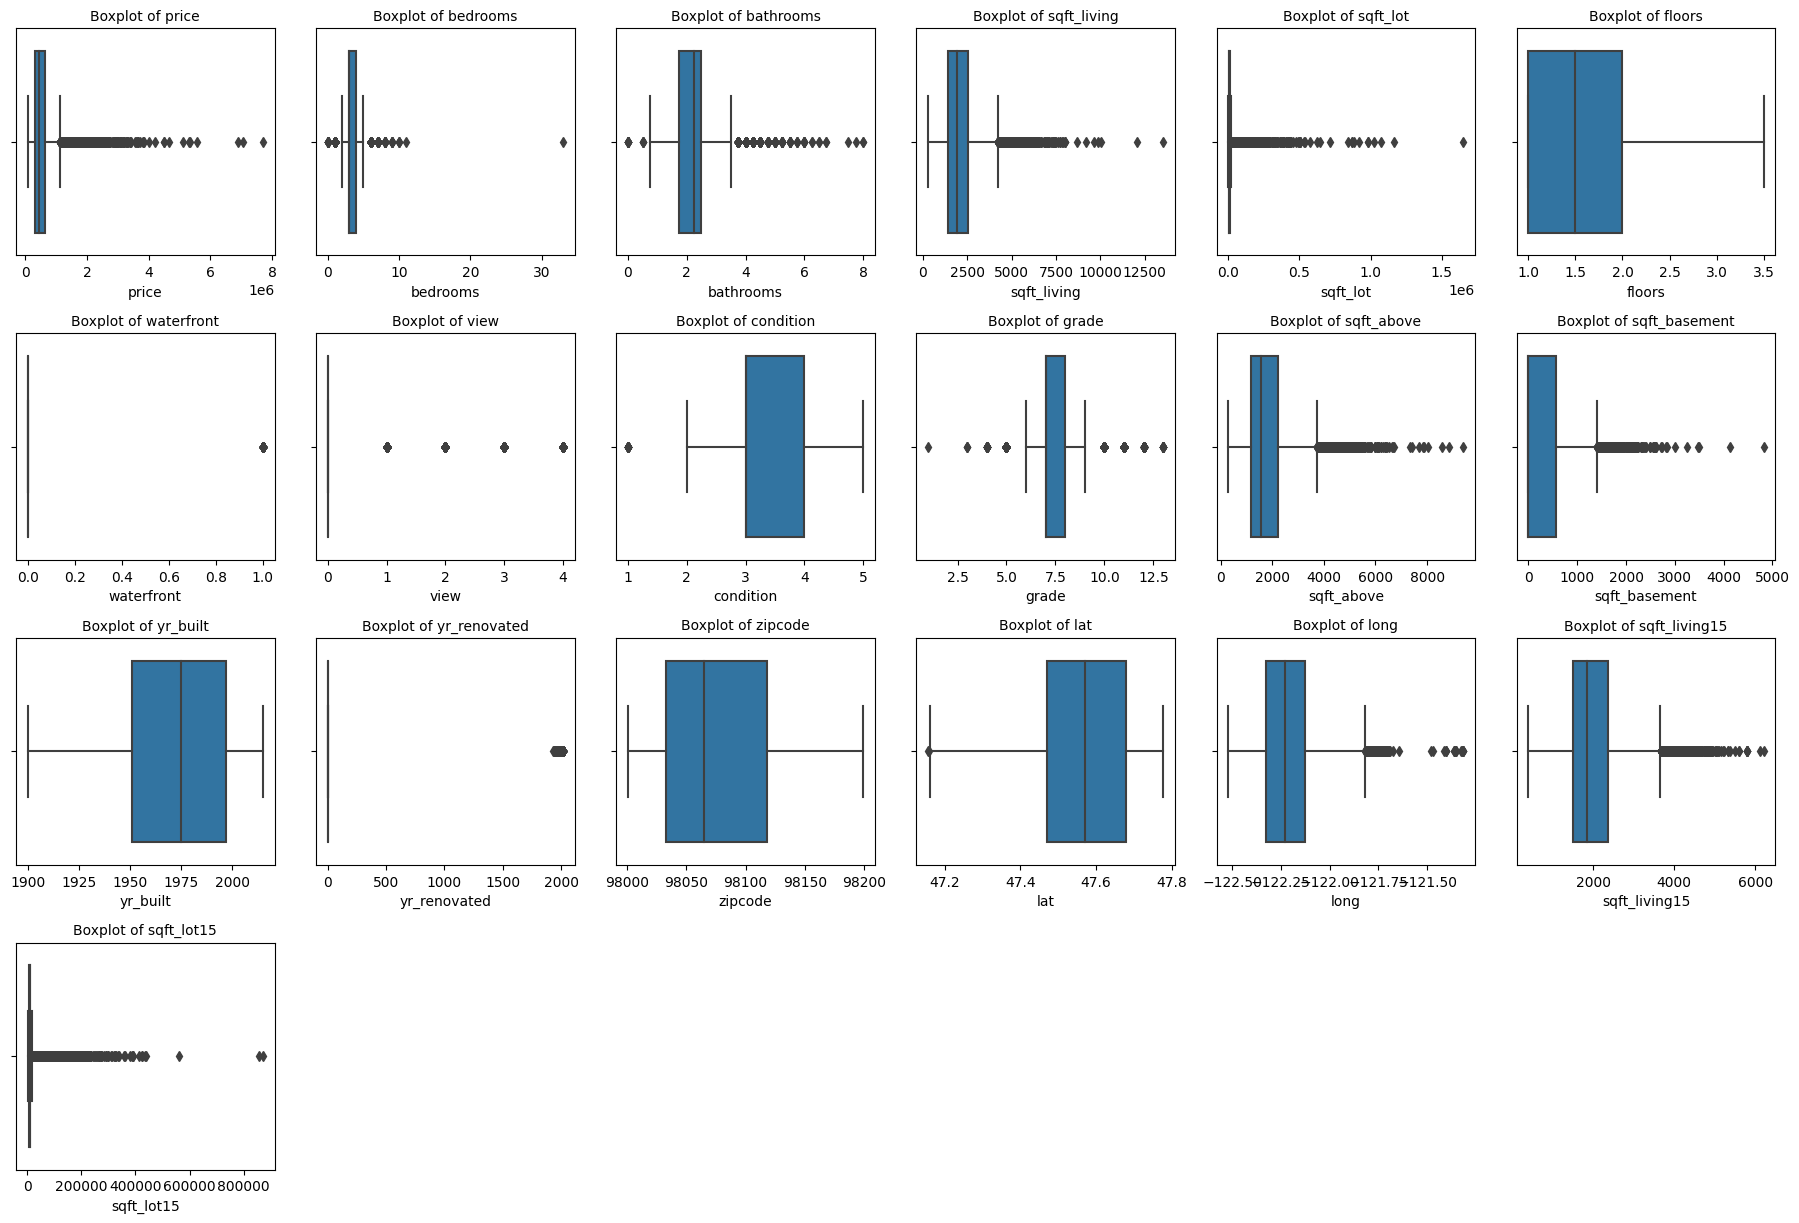

In [88]:
#check for outliers
fig, axes = plt.subplots(6, 6, figsize=(18, 18)) 
axes = axes.flatten()

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}', fontsize=10)

# Hide any empty subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [89]:
# Shift the "long" column to make all values positive
if min_value < 0:
    df["long"] = abs(df["long"])

In [90]:
# Apply logarithmic transformation [Log transformation (adding 1 to avoid log(0) issues)]

for column in df.columns:
    df[column] = np.log1p(df[column])


In [91]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.0,1.386294,2.079442,7.074117,0.000000,7.578657,0.000000,11.494548,3.881795,4.814272,7.201171,8.639588
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.0,1.386294,2.079442,7.682943,5.993961,7.576610,7.596894,11.494008,3.886110,4.814774,7.433075,8.941153
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.0,1.386294,1.945910,6.647688,0.000000,7.567346,0.000000,11.493019,3.886457,4.814077,7.908755,8.995041
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.0,1.791759,2.079442,6.957497,6.814543,7.583756,0.000000,11.494120,3.881993,4.815374,7.215975,8.517393
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.0,1.386294,2.197225,7.427144,0.000000,7.594884,0.000000,11.493488,3.883969,4.812550,7.496097,8.923191


price
13.017005    172
12.765691    172
13.217675    159
13.122365    152
12.959847    150
            ... 
12.987581      1
13.112305      1
13.726134      1
13.182811      1
13.131523      1
Name: count, Length: 4028, dtype: int64


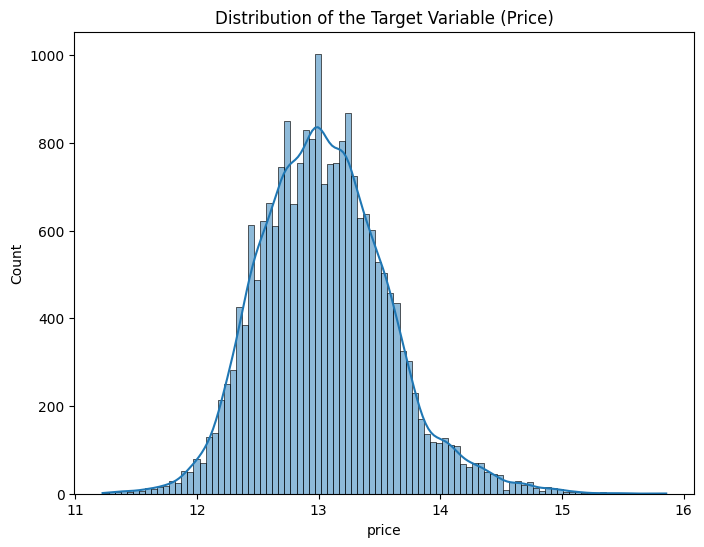

In [92]:
# Exploratory Data Analysis (EDA)
## Visualize the distribution of the target variable
count = df['price'].value_counts()
print(count)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of the Target Variable (Price)')
plt.show()

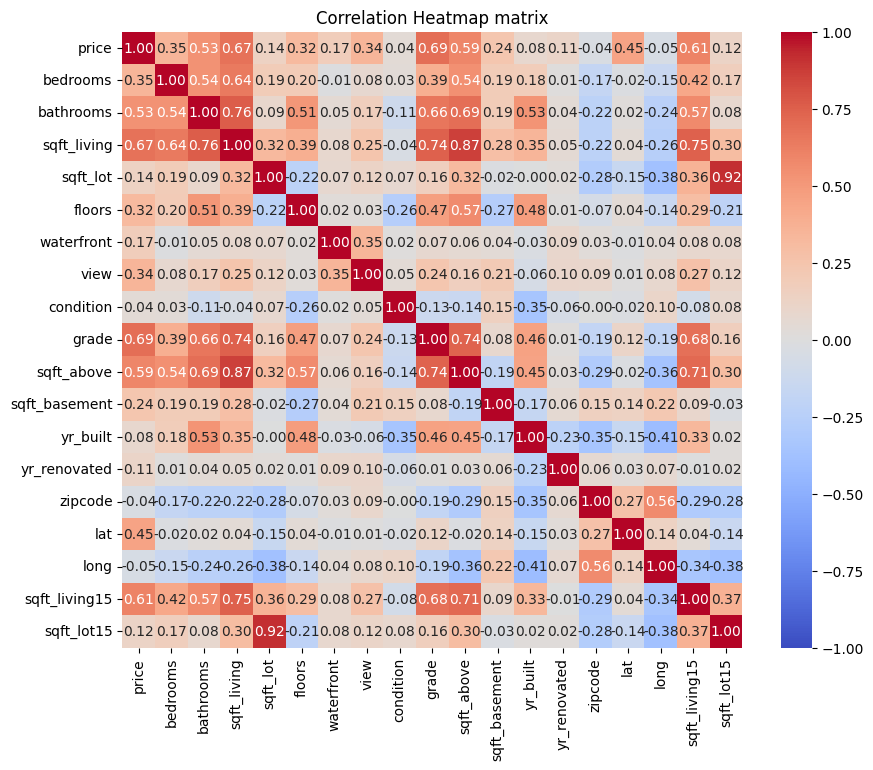

In [93]:
#Examine the relationships between features and the target through pair plots or correlation matrices.
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10 ,8))
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm' , fmt= '.2f' , vmin=-1 , vmax= 1)
plt.title("Correlation Heatmap matrix")
plt.show()

In [ ]:
#pairplots
#plt.figure(figsize=(8,8))
#sns.pairplot(df , x_vars= X , y_vars= Y , kind='reg' )
#plt.show()

In [94]:
# Identify the target variable and potential features
X = df.drop('price' , axis= 1 ) #features
Y = df["price"] #target

In [95]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.0,1.386294,2.079442,7.074117,0.000000,7.578657,0.000000,11.494548,3.881795,4.814272,7.201171,8.639588
1,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.0,1.386294,2.079442,7.682943,5.993961,7.576610,7.596894,11.494008,3.886110,4.814774,7.433075,8.941153
2,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.0,1.386294,1.945910,6.647688,0.000000,7.567346,0.000000,11.493019,3.886457,4.814077,7.908755,8.995041
3,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.0,1.791759,2.079442,6.957497,6.814543,7.583756,0.000000,11.494120,3.881993,4.815374,7.215975,8.517393
4,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.0,1.386294,2.197225,7.427144,0.000000,7.594884,0.000000,11.493488,3.883969,4.812550,7.496097,8.923191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.386294,1.252763,7.333676,7.031741,1.386294,0.0,0.0,1.386294,2.197225,7.333676,0.000000,7.605890,0.000000,11.493783,3.885665,4.814993,7.333676,7.319865
21609,1.609438,1.252763,7.745436,8.668024,1.098612,0.0,0.0,1.386294,2.197225,7.745436,0.000000,7.608374,0.000000,11.494222,3.881784,4.815123,7.512618,8.881975
21610,1.098612,0.559616,6.928538,7.208600,1.098612,0.0,0.0,1.386294,2.079442,6.928538,0.000000,7.605890,0.000000,11.494201,3.883508,4.814612,6.928538,7.604894
21611,1.386294,1.252763,7.378384,7.778630,1.098612,0.0,0.0,1.386294,2.197225,7.378384,0.000000,7.603399,0.000000,11.493008,3.882275,4.812745,7.252054,7.160846


In [96]:
# Split the dataset into training and testing sets. 
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size= 0.2 , shuffle = True  , random_state= 42)

In [97]:
#feature scaling robustscaler
scalar = RobustScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)   


In [98]:
x_train

array([[ 0.        , -0.49648698, -0.12269871, ..., -0.38736642,
         0.86124223,  0.79576462],
       [-1.28922423, -1.44293574, -1.12616676, ...,  0.28913702,
        -0.79444801, -0.61748149],
       [ 0.        , -1.44293574, -0.99226019, ...,  0.50957226,
        -0.97015894,  0.03523413],
       ...,
       [ 0.        ,  0.22024989,  0.18158112, ..., -0.97624677,
        -0.18223567, -1.54925422],
       [-3.10628372, -1.83979283, -2.80847602, ...,  0.4507974 ,
        -0.97015894,  0.99514052],
       [ 1.        ,  0.22024989,  0.85987349, ..., -0.64738446,
         1.06199245, -0.35060735]])

In [99]:
#build and train the model
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [100]:
#Model Evaluation
y_pred = model.predict(x_test)   

In [101]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score (Performance): {r2}")

Mean Squared Error: 0.0650792099651757
R2 Score (Performance): 0.7716765569924909


In [102]:
root = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {root:.2f}")

Root Mean Squared Error (RMSE): 0.26


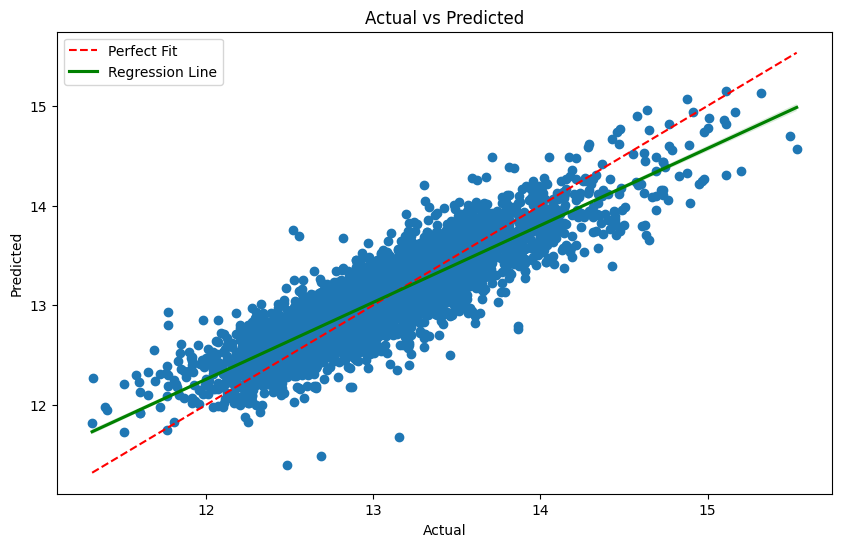

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(y_test , y_pred)
# Perfect fit line (y_test == y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , label='Perfect Fit')
# Overlay regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, line_kws={"color": "green"}, label='Regression Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



In [104]:
#Conclusion
# Summarize the findings from the linear regression task. 
#Reflect on the model's performance and potential areas for improvement. 
print("The model's performance shows the relationship between features and the target variable. The R-score value indicates the proportion of variance explained by the model. Further improvements could include feature engineering, model tuning, or using more complex models.")


The model's performance shows the relationship between features and the target variable. The R-score value indicates the proportion of variance explained by the model. Further improvements could include feature engineering, model tuning, or using more complex models.
